In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
#%matplotlib tk
from gridworld_env import GridworldEnv

In [2]:
from gym import spaces

In [3]:
? spaces.Box

In [3]:
env = GridworldEnv(1) # Number of plan 

In [12]:
env._reset()
print(env.action_space.sample())
env._step(env.action_space.sample())

1


(array([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 3, 0, 0, 1],
        [1, 0, 2, 0, 0, 0, 2, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 4, 0, 0, 2, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 2, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]]), 0, False, {'success': True})

In [13]:
env.verbose = True
_ = env._reset()
print( env._get_agent_start_target_state())

((4, 3), (1, 4))


In [14]:
env.grid_map_shape

(8, 8)

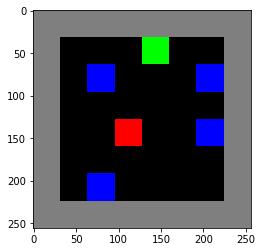

In [15]:
imshow( env._render(mode='rgb_array')  )

In [16]:
import gym

In [17]:
gym.version.VERSION

'0.10.3'

In [18]:
env.observation_space

Box(8, 8)

In [19]:
env.action_space

Discrete(5)

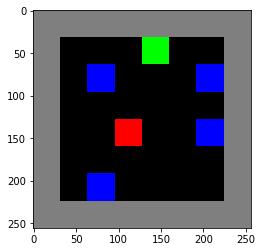

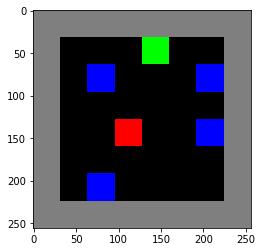

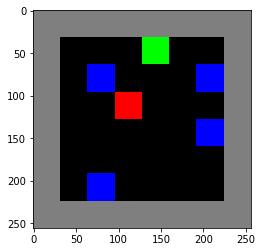

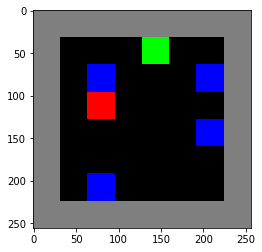

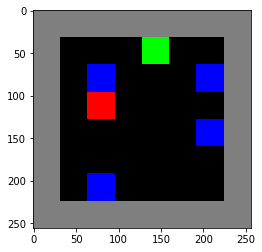

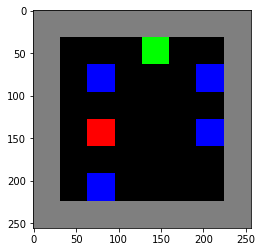

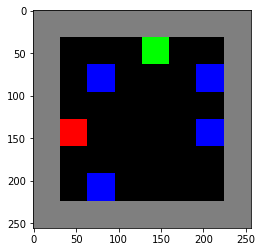

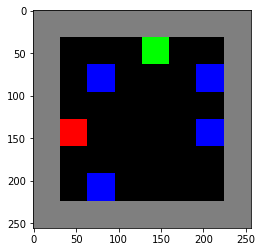

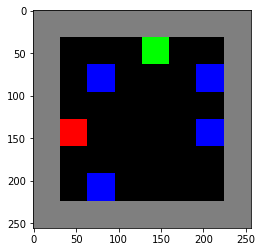

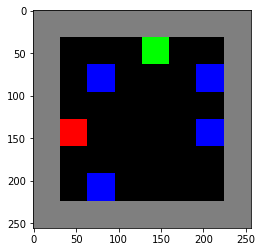

In [21]:
# Try random policy 
env._reset()
for _ in range(10):
    plt.figure()
    plt.imshow( env._render(mode='rgb_array')  )
    env._step(env.action_space.sample()) # take a random action]